In [5]:
# == SETUP == #

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# setup the plotting style for the blog:

plt.style.use("seaborn-v0_8-whitegrid")  # clean background
plt.rcParams.update({
    # Figure
    "figure.figsize": (6, 4),
    "figure.dpi": 300,

    # Fonts
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,

    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,

    # Legend
    "legend.fontsize": 11,
    "legend.frameon": False,

    # Grid
    "grid.alpha": 0.4,

    # Spines (only keep left + bottom)
    "axes.spines.top": False,
    "axes.spines.right": False,

    # Spine + tick thickness
    "axes.linewidth": 1.5,
    "xtick.major.width": 1.5,
    "ytick.major.width": 1.5,
    "xtick.minor.width": 1.2,
    "ytick.minor.width": 1.2,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,

    "axes.edgecolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
})

    n  run  On2_time_ms  On_time_ms  HillisSteele_time_ms  Blelloch_time_ms  \
0  32    1     0.267701    0.015378              0.873430          1.273572   
1  32    2     0.272391    0.016761              0.071563          0.164818   
2  32    3     0.276522    0.016750              0.082763          0.155385   
3  32    4     0.271453    0.016762              0.088473          0.124929   
4  32    5     0.268633    0.016727              0.090855          0.179519   

   BlellochGPU_time_ms  correct_HS  correct_Blelloch  correct_BlellochGPU  
0            76.885744           1                 1                    1  
1             0.252325           1                 1                    1  
2             0.222976           1                 1                    1  
3             0.220797           1                 1                    1  
4             0.218919           1                 1                    1  


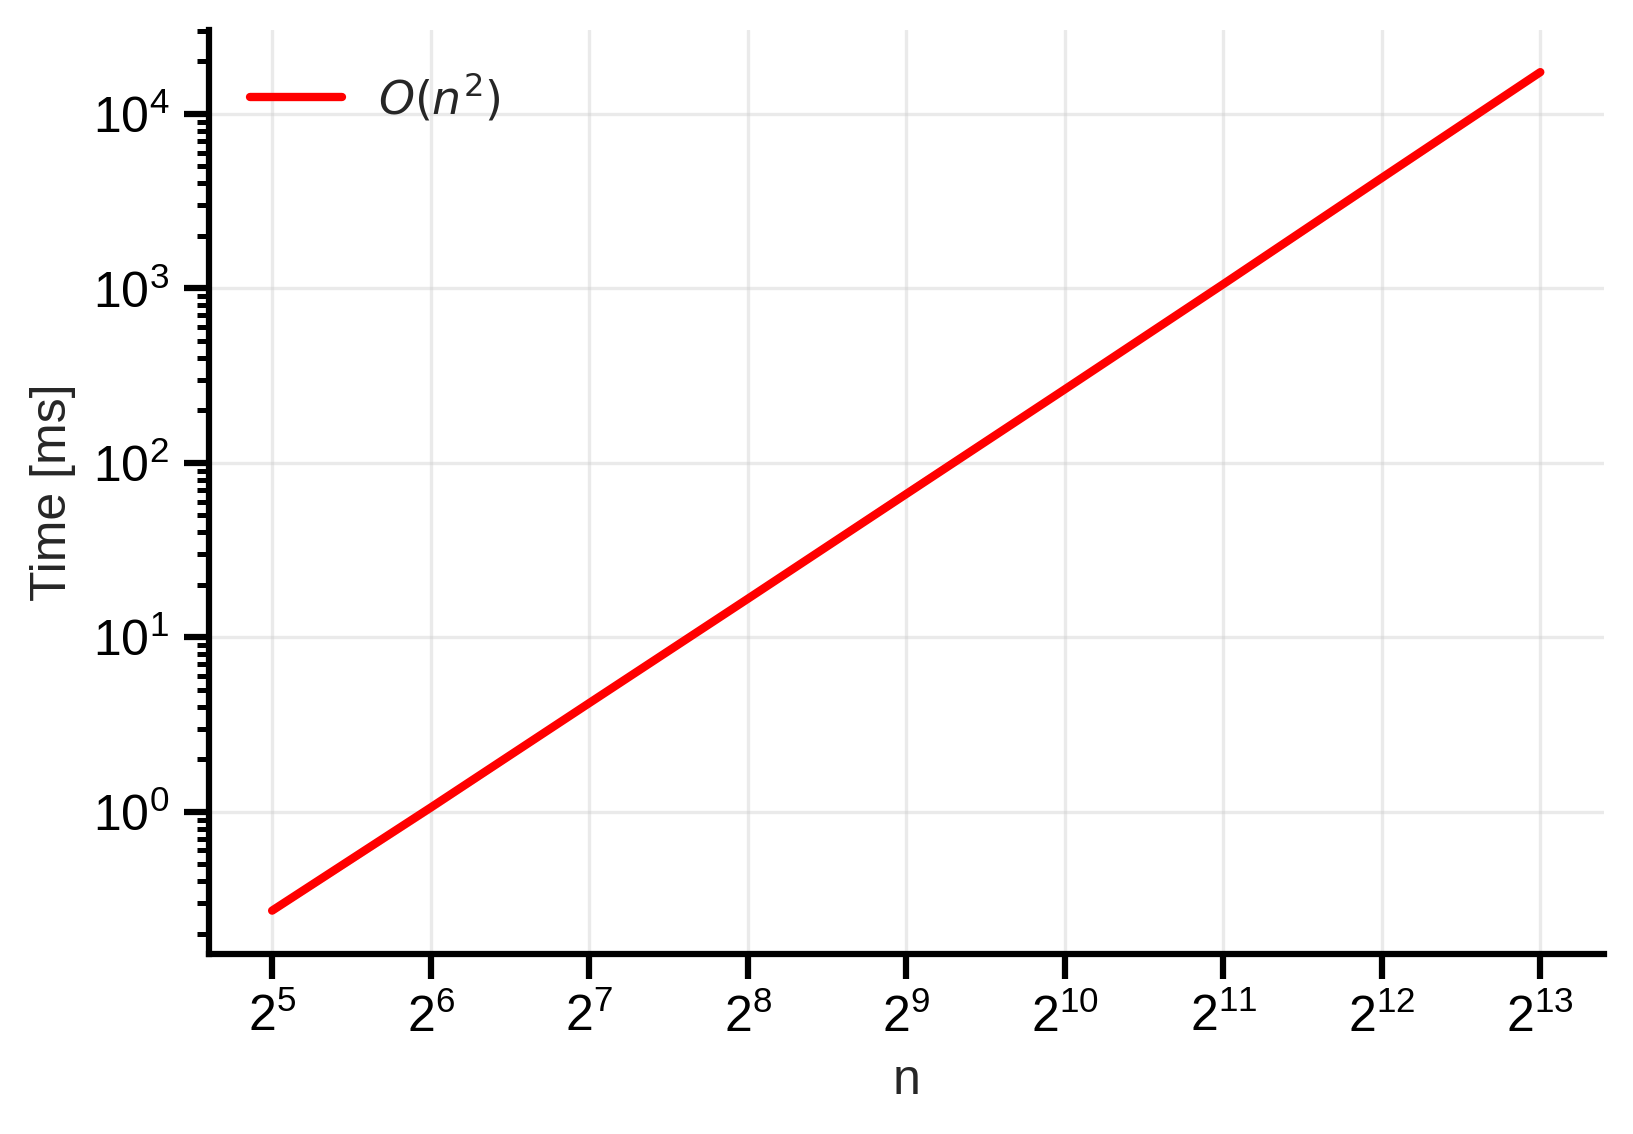

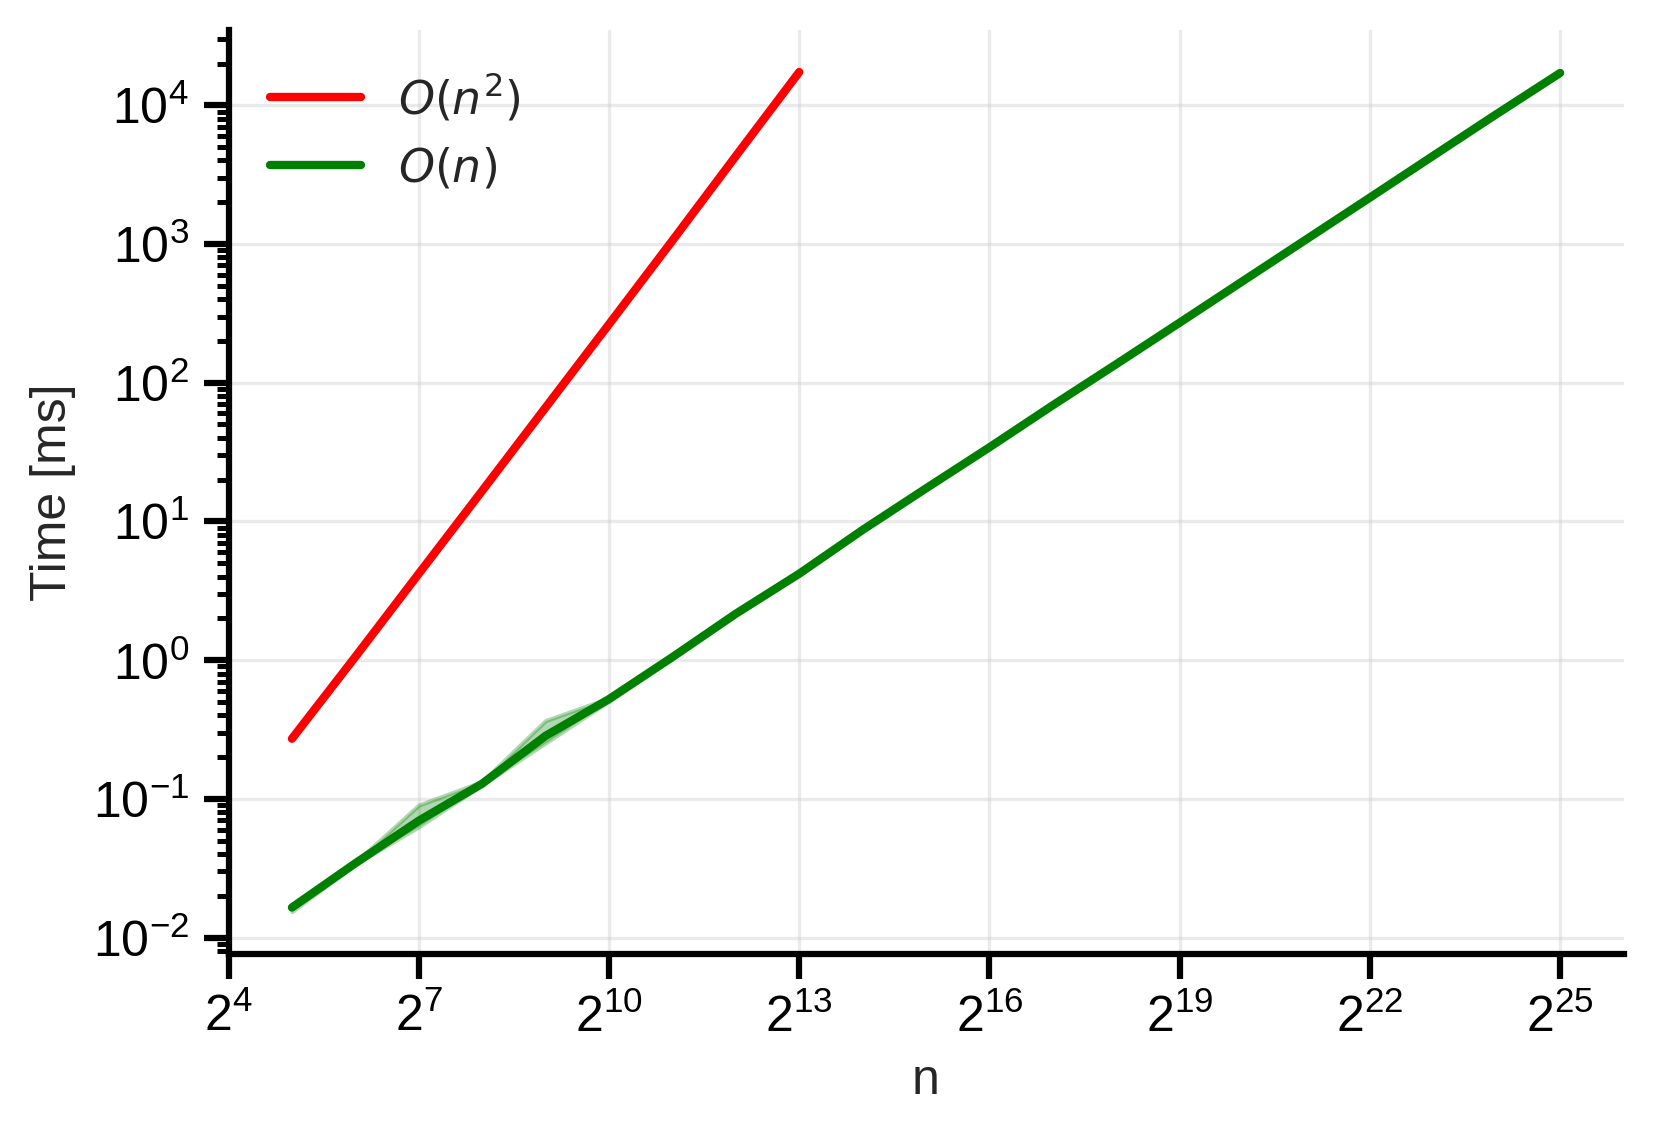

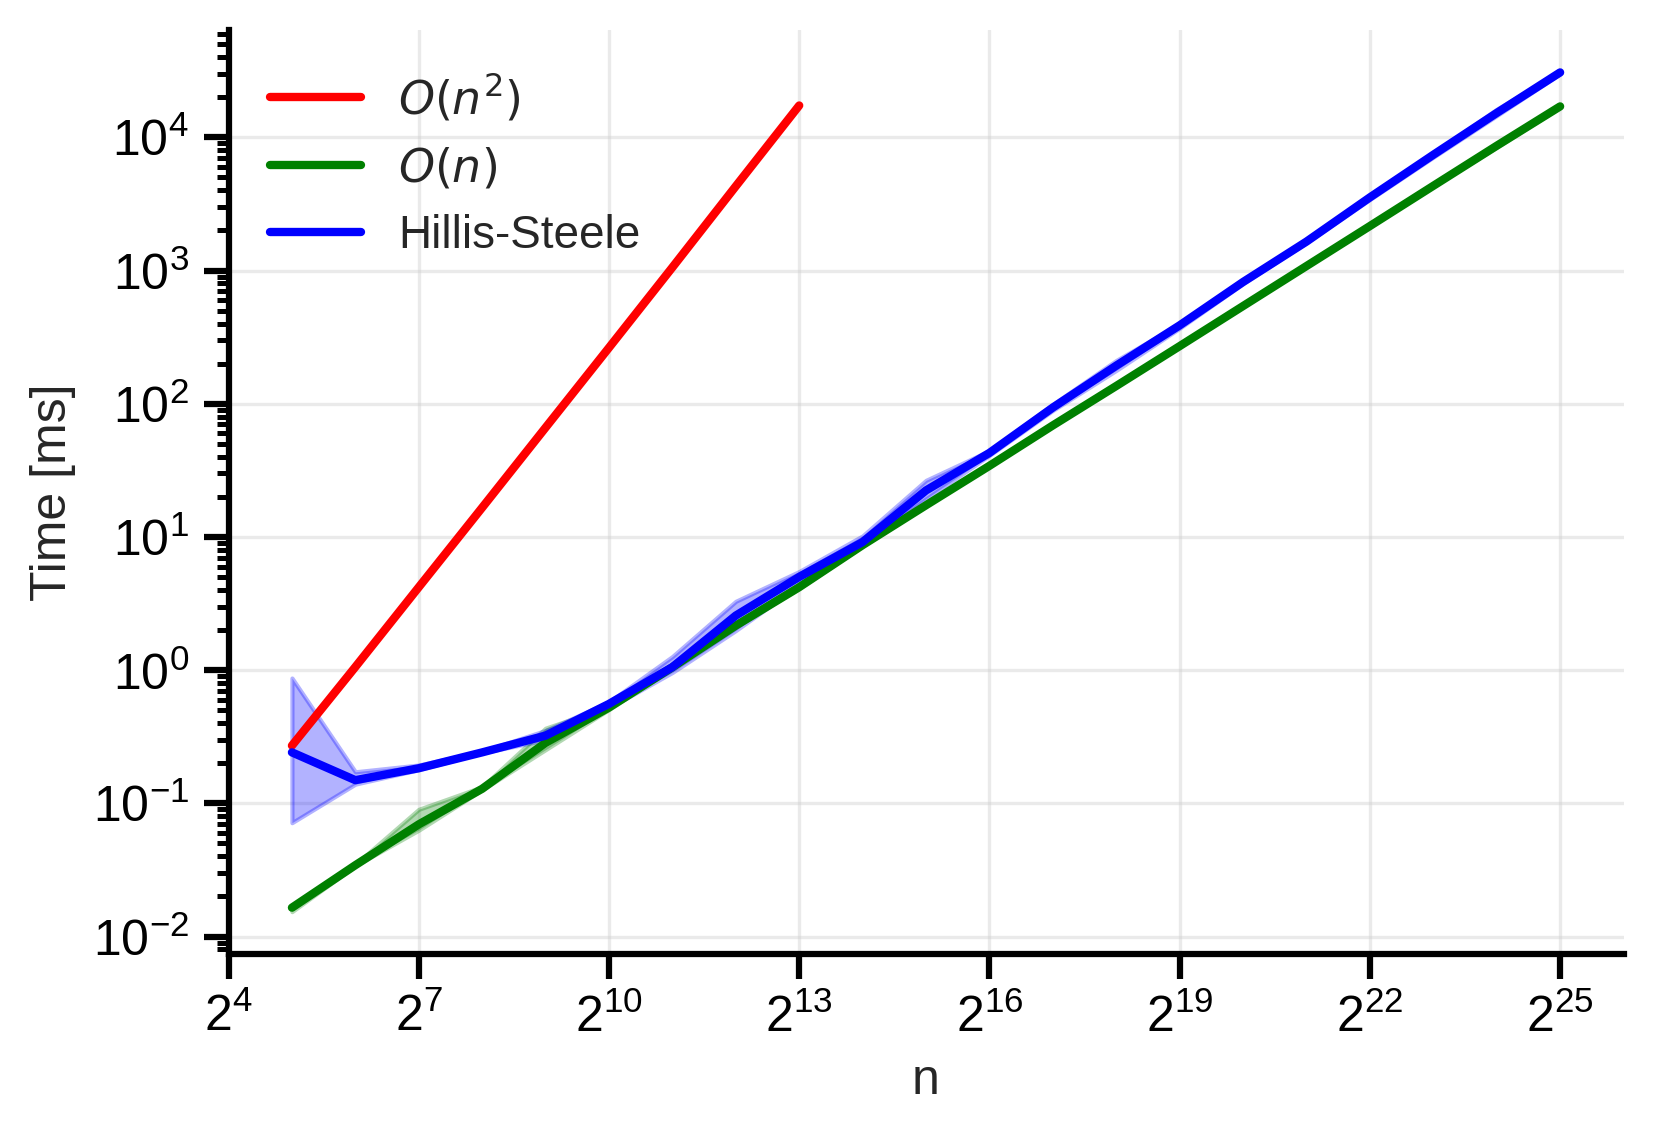

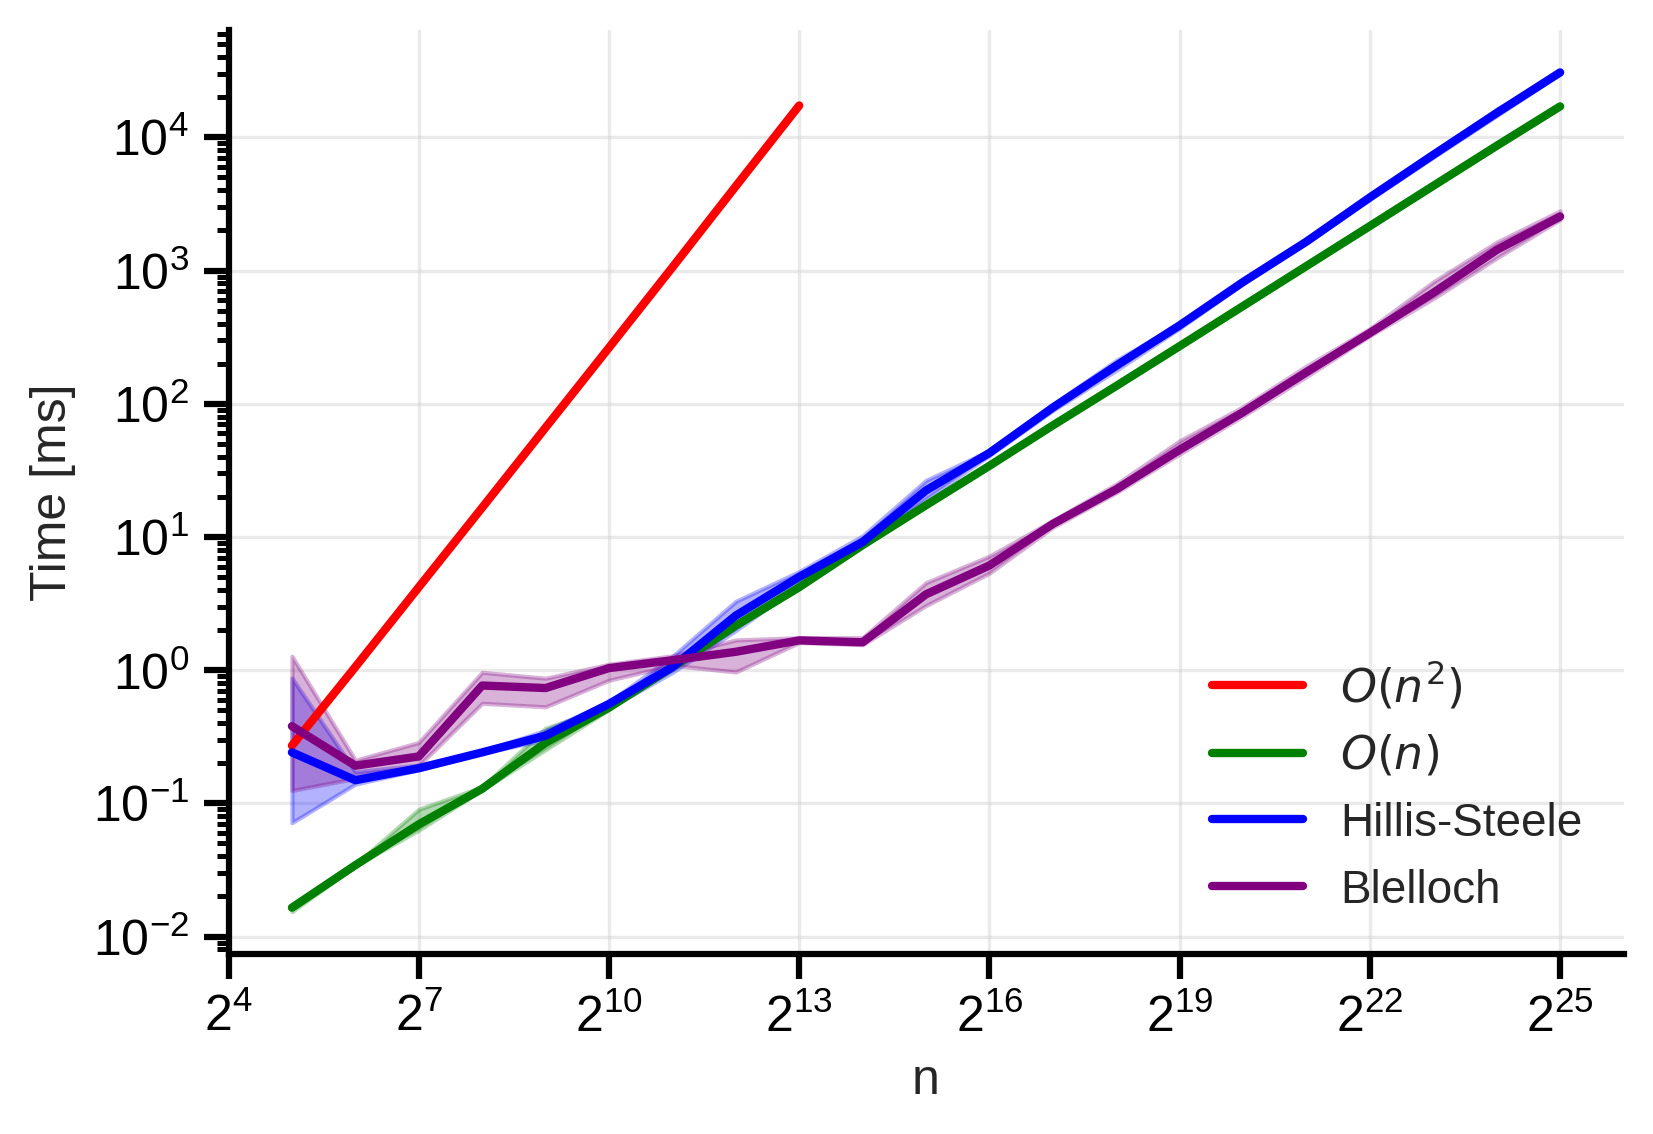

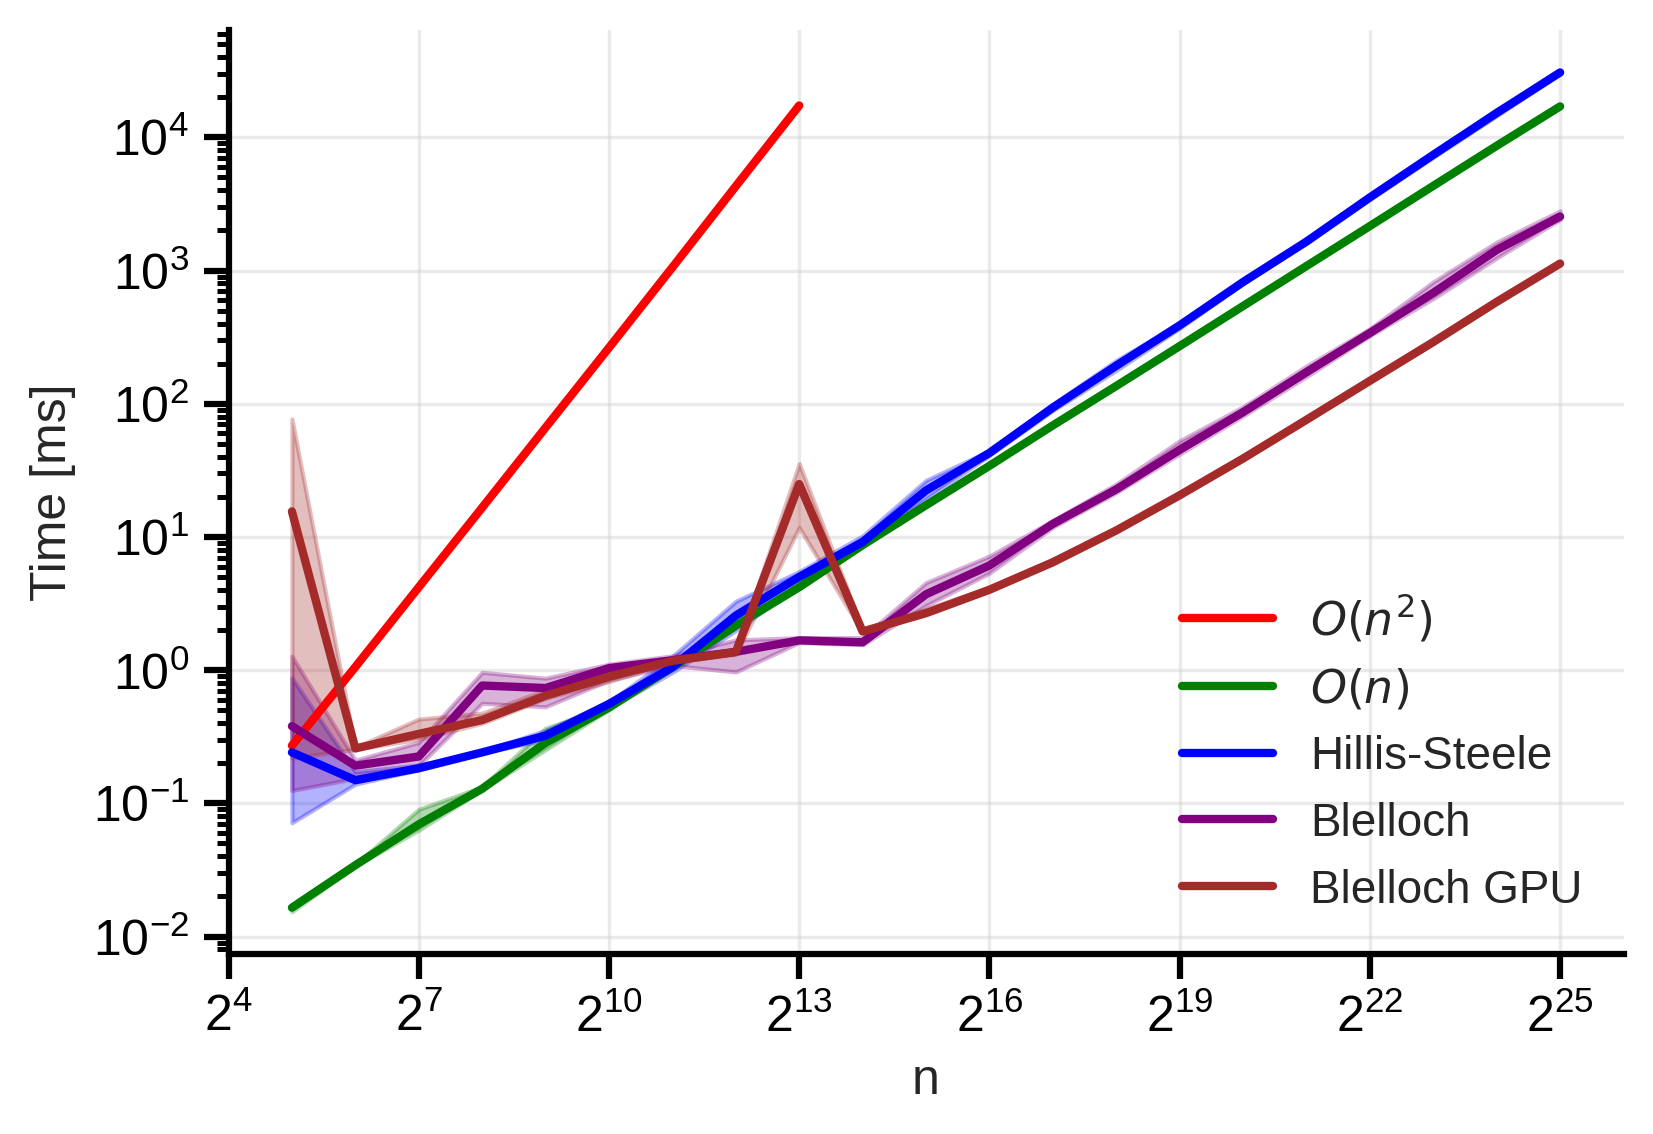

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load CSV
path = "scan_benchmark_runs.csv"
df = pd.read_csv(path)
print(df.head())

# Replace skipped O(n²) times (-1) with NaN so they won't appear on plots
df["On2_time_ms"] = df["On2_time_ms"].replace(-1, np.nan)

# Helper function to plot shaded mean ± min/max
def plot_mean_minmax(ax, x, y, label, color):
    grouped = df.groupby(x)[y]
    mean = grouped.mean()
    min_ = grouped.min()
    max_ = grouped.max()
    
    ax.plot(mean.index, mean.values, label=label, color=color)
    ax.fill_between(mean.index, min_.values, max_.values, color=color, alpha=0.3)

# == PLOT 1: Only O(n^2) ==
fig, ax = plt.subplots()
plot_mean_minmax(ax, "n", "On2_time_ms", r"$O(n^2)$", "red")
ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.set_xlabel("n")
ax.set_ylabel("Time [ms]")
ax.legend()
# save the figure, png, "naive_scan_On2_time_complexity.png"
plt.savefig("img/naive_scan_On2_time_complexity.png", dpi=300, bbox_inches='tight')
plt.show()

# == PLOT 2: O(n^2) and O(n) ==
fig, ax = plt.subplots()
plot_mean_minmax(ax, "n", "On2_time_ms", r"$O(n^2)$", "red")
plot_mean_minmax(ax, "n", "On_time_ms", r"$O(n)$", "green")
ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.set_xlabel("n")
ax.set_ylabel("Time [ms]")
ax.legend()
plt.savefig("img/naive_scan_On_time_complexity.png", dpi=300, bbox_inches='tight')
plt.show()

# == PLOT 3: O(n^2), O(n), Hillis-Steele ==
fig, ax = plt.subplots()
plot_mean_minmax(ax, "n", "On2_time_ms", r"$O(n^2)$", "red")
plot_mean_minmax(ax, "n", "On_time_ms", r"$O(n)$", "green")
plot_mean_minmax(ax, "n", "HillisSteele_time_ms", r"Hillis-Steele", "blue")
ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.set_xlabel("n")
ax.set_ylabel("Time [ms]")
ax.legend()
plt.savefig("img/hillis_steele_time_complexity.png", dpi=300, bbox_inches='tight')
plt.show()

# == PLOT 4: All algorithms including Blelloch ==
fig, ax = plt.subplots()
plot_mean_minmax(ax, "n", "On2_time_ms", r"$O(n^2)$", "red")
plot_mean_minmax(ax, "n", "On_time_ms", r"$O(n)$", "green")
plot_mean_minmax(ax, "n", "HillisSteele_time_ms", r"Hillis-Steele", "blue")
plot_mean_minmax(ax, "n", "Blelloch_time_ms", r"Blelloch", "purple")
ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.set_xlabel("n")
ax.set_ylabel("Time [ms]")
ax.legend()
plt.savefig("img/blelloch_time_complexity.png", dpi=300, bbox_inches='tight')
plt.show()

# == PLOT 5: ALL algorithms including GPU versions ==
fig, ax = plt.subplots()
plot_mean_minmax(ax, "n", "On2_time_ms", r"$O(n^2)$", "red")
plot_mean_minmax(ax, "n", "On_time_ms", r"$O(n)$", "green")
plot_mean_minmax(ax, "n", "HillisSteele_time_ms", r"Hillis-Steele", "blue")
plot_mean_minmax(ax, "n", "Blelloch_time_ms", r"Blelloch", "purple")
plot_mean_minmax(ax, "n", "BlellochGPU_time_ms", r"Blelloch GPU", "brown")
ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.set_xlabel("n")
ax.set_ylabel("Time [ms]")
ax.legend()
plt.savefig("img/all_scan_time_complexity.png", dpi=300, bbox_inches='tight')
plt.show()
